Population in different countries  
2 Datasets from kaggle

In [5]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_density= pd.read_csv('../data/life_ladder_pop_density_merged.txt')
df_density.columns = df_density.columns.str.replace(' ','_')
df_density.columns = df_density.columns.str.replace('(per_km²)','per_sq_km')
df_density.columns = df_density.columns.str.replace('(km²)','sq_km')
df_density.columns = df_density.columns.str.lower()
df_density.head(10)

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,continent,population,area_sq_km,density_per_sq_km
0,Afghanistan 2008,2008.0,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258,Asia,26460334.0,652230.0,40.569023
1,Afghanistan 2009,2009.0,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237,Asia,27325003.0,652230.0,41.894735
2,Afghanistan 2010,2010.0,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275,Asia,28189672.0,652230.0,43.220447
3,Afghanistan 2011,2011.0,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267,Asia,29302437.4,652230.0,44.926540
4,Afghanistan 2012,2012.0,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268,Asia,30415202.8,652230.0,46.632634
5,Afghanistan 2013,2013.0,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273,Asia,31527968.2,652230.0,48.338727
6,Afghanistan 2014,2014.0,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375,Asia,32640733.6,652230.0,50.044821
7,Afghanistan 2015,2015.0,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339,Asia,33753499.0,652230.0,51.750915
8,Afghanistan 2016,2016.0,4.220,7.650,0.559,52.925,0.523,0.044,0.793,0.501,0.348,Asia,34797245.2,652230.0,53.351188
9,Afghanistan 2017,2017.0,2.662,7.648,0.491,53.250,0.427,-0.119,0.954,0.435,0.371,Asia,35840991.4,652230.0,54.951461


In [7]:
df_density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2948 non-null   object 
 1   year                              2199 non-null   float64
 2   life_ladder                       2199 non-null   float64
 3   log_gdp_per_capita                2179 non-null   float64
 4   social_support                    2186 non-null   float64
 5   healthy_life_expectancy_at_birth  2145 non-null   float64
 6   freedom_to_make_life_choices      2166 non-null   float64
 7   generosity                        2126 non-null   float64
 8   perceptions_of_corruption         2083 non-null   float64
 9   positive_affect                   2175 non-null   float64
 10  negative_affect                   2183 non-null   float64
 11  continent                         2898 non-null   object 
 12  popula

In [18]:
df_density.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'continent', 'population', 'area_sq_km', 'density_per_sq_km'],
      dtype='object')

In [19]:
df_extract = df_density[['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices','perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'population', 'area_sq_km','density_per_sq_km']]

In [20]:
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2948 non-null   object 
 1   year                              2199 non-null   float64
 2   life_ladder                       2199 non-null   float64
 3   log_gdp_per_capita                2179 non-null   float64
 4   social_support                    2186 non-null   float64
 5   healthy_life_expectancy_at_birth  2145 non-null   float64
 6   freedom_to_make_life_choices      2166 non-null   float64
 7   perceptions_of_corruption         2083 non-null   float64
 8   positive_affect                   2175 non-null   float64
 9   negative_affect                   2183 non-null   float64
 10  population                        2898 non-null   float64
 11  area_sq_km                        2898 non-null   float64
 12  densit

In [21]:
df_extract.dropna(inplace=True)
df_extract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1968 entries, 0 to 2181
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1968 non-null   object 
 1   year                              1968 non-null   float64
 2   life_ladder                       1968 non-null   float64
 3   log_gdp_per_capita                1968 non-null   float64
 4   social_support                    1968 non-null   float64
 5   healthy_life_expectancy_at_birth  1968 non-null   float64
 6   freedom_to_make_life_choices      1968 non-null   float64
 7   perceptions_of_corruption         1968 non-null   float64
 8   positive_affect                   1968 non-null   float64
 9   negative_affect                   1968 non-null   float64
 10  population                        1968 non-null   float64
 11  area_sq_km                        1968 non-null   float64
 12  density_per

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_3692/598996378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extract.dropna(inplace=True)


In [22]:
df_extract.to_csv('../data/life_ladder_and_population_density_combined.txt', index=False)

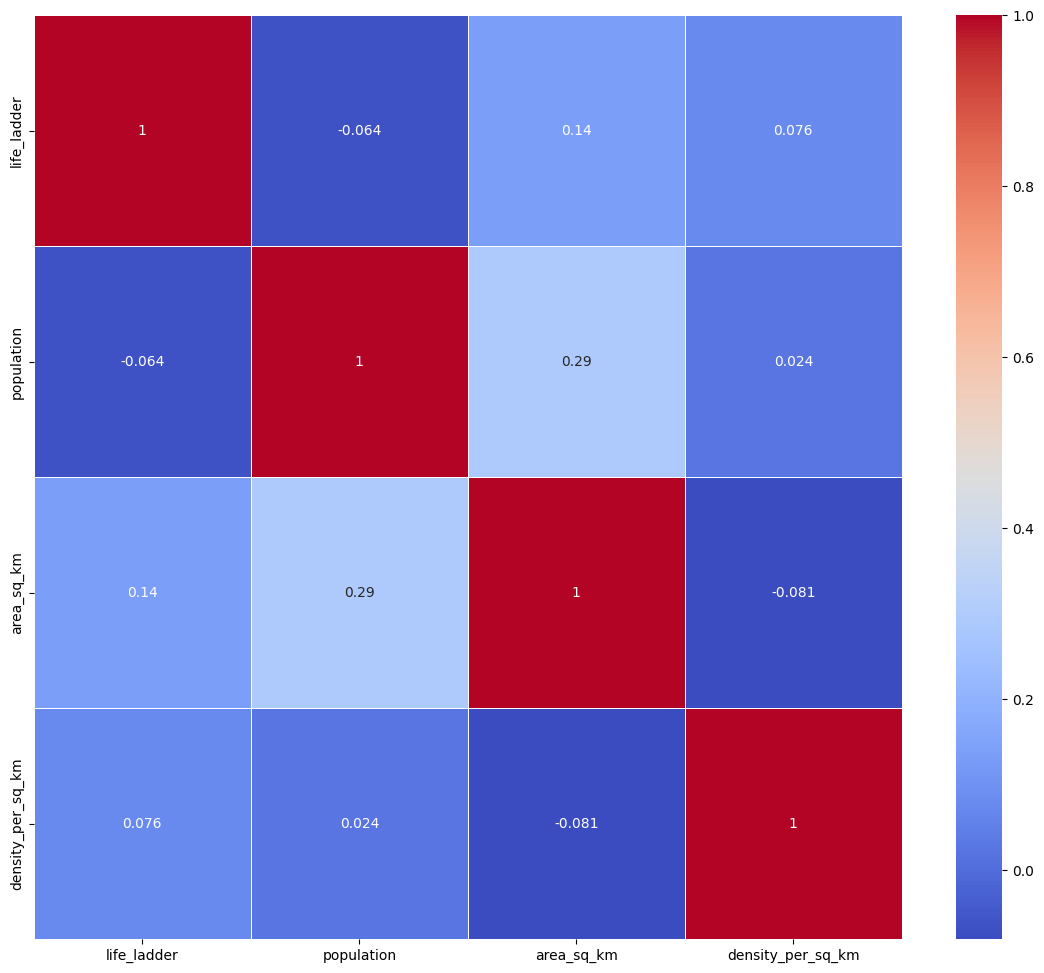

In [25]:
corr_columns=['life_ladder', 'population', 'area_sq_km','density_per_sq_km']
plt.figure(figsize = (14,12))
ax = sns.heatmap(df_extract[corr_columns].corr(),
                 linewidths=.5, annot=True, cmap='coolwarm')

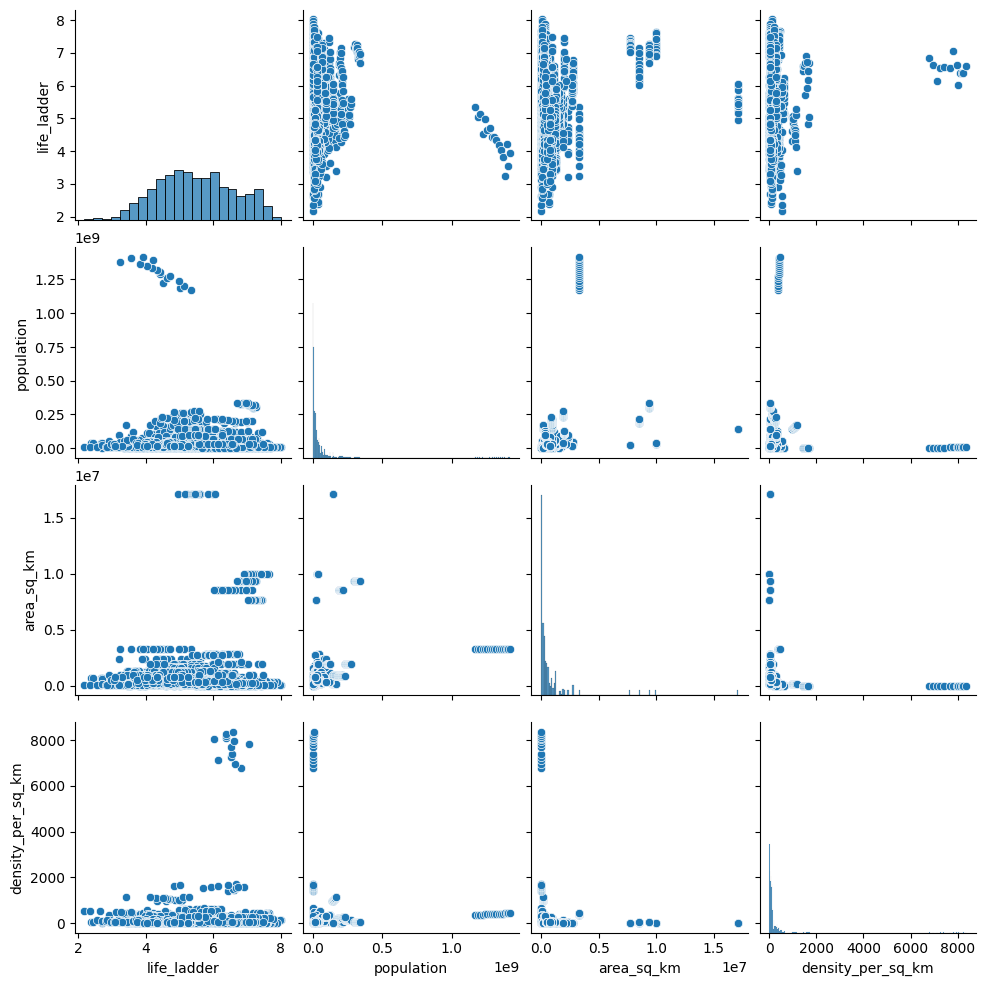

In [26]:
# Plot pair plot of potential features
sns.pairplot(df_extract[corr_columns]);